In [15]:
import quandl
import reframed as reframed
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
from numpy import mean
from numpy import std
import requests
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing as pre
from matplotlib import pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier


# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return X, y

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def sckLearn_regression_polynomial(x,y,split,degree_poly):
    i = 0
    x_test = x[(x.size * split).__round__():]
    y_test = y[(y.size * split).__round__():]
    x_train = x[:(x.size * split).__round__()]
    y_train = y[:(y.size * split).__round__()]
    poly = PolynomialFeatures(degree=degree_poly)
    X_poly = poly.fit_transform(x_train)
    lin2 = LinearRegression()
    lin2.fit(X_poly, y_train.ravel())
    y_pred = lin2.predict(poly.fit_transform(x_test))
    y_trend = lin2.predict(poly.fit_transform(x_train))
    return y_pred,y_trend


def print_hi(name):
    # Use a breakpoint in the code line below to debug your script.
    print(f'Hi, {name}')  # Press Ctrl+F8 to toggle the breakpoint.

In [16]:
# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    test_dataframes = {}
    train_dataframes = {}
    test_Open = {}
    quandl.ApiConfig.api_key = 'NKL13i-RzgYty_HQNy7_'
    data = ['BCHARTS/KRAKENUSD']
    index = 1
    for i in range(index):
        train_dataframes[i] = pd.DataFrame(quandl.get(data[i], start_date="2016-05-20'", end_date="2017-12-31"))
    for j in range(index):
        test_dataframes[j] = pd.DataFrame(quandl.get(data[j], start_date="'2017-01-01", end_date="2018-05-01"))
    test_merged = test_dataframes[0]
    test_Open = test_merged['Open']
    test_Open.replace(0, np.nan, inplace=True)
    test_Open = test_Open.mean(axis=0)
    btc_test_dataframes = test_dataframes[0]
    btc_test_Closed = btc_test_dataframes['Close']
    btc_test_Closed.replace(0, np.nan, inplace=True)
    btc_test_Closed = btc_test_Closed.mean(axis=0)
    btc_test_dataframes['Avg Close'] = btc_test_Closed
    btc_test_dataframes['Avg Open'] = test_Open
    btc_test_dataframes.to_csv('out.csv', index=False)
    test_merged
    training_set = pd.read_csv('out.csv')  # reading csv file
    res = []
    for i in range(training_set.shape[0]):
        res.append([i + 1])

    scale = MinMaxScaler()
    y_training = scale.fit_transform(training_set.iloc[:, 0:1])
    x1, x2, y1, y2 = train_test_split(res, y_training, train_size=0.9, shuffle=False)
    # x_training
    # y_training
    # training_set
    res1 = scale.fit_transform(res)
    res = scale.fit_transform(res)
    res = res.reshape((-1, 1, 1))
    x1 = scale.fit_transform(x1)
    print_hi('PyCharm')
    split = 90/ 100
    y_pred,y_trend = sckLearn_regression_polynomial(x1, y1, split, 2)
    #
    x_test = x1[(x1.size * split).__round__():]
    y_test = y1[(y1.size * split).__round__():]
    x_train = x1[:(x1.size * split).__round__()]
    y_train = y1[:(y1.size * split).__round__()]

Hi, PyCharm


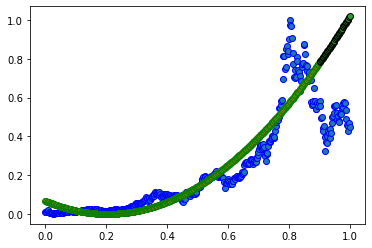

In [17]:
plt.scatter(x1, y1, edgecolors='blue')
plt.scatter(x_train, y_trend, edgecolors='green')
plt.scatter(x_test, y_pred, edgecolors='black')
plt.show()